<a href="https://colab.research.google.com/github/divgupt12/Credit_Card_Default/blob/main/CC_Default.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/Credit Card Default II.csv")

In [ ]:
df

,clientid,income,age,loan,default
0,1,66155.92510,59.017015,8106.532131,0
1,2,34415.15397,48.117153,6564.745018,0
2,3,57317.17006,63.108049,8020.953296,0
3,4,42709.53420,45.751972,6103.642260,0
4,5,66952.68885,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.04487,48.518179,1926.729397,0
1996,1997,69516.12757,23.162104,3503.176156,0
1997,1998,44311.44926,28.017167,5522.786693,1
1998,1999,43756.05660,63.971796,1622.722598,0


In [ ]:
df.isnull().any() #age has some missing values

clientid    False
income      False
age          True
loan        False
default     False
dtype: bool

In [ ]:
df.dropna(inplace = True) #dropping the missing values

In [ ]:
df.isnull().any()

clientid    False
income      False
age         False
loan        False
default     False
dtype: bool

In [ ]:
df

,clientid,income,age,loan,default
0,1,66155.92510,59.017015,8106.532131,0
1,2,34415.15397,48.117153,6564.745018,0
2,3,57317.17006,63.108049,8020.953296,0
3,4,42709.53420,45.751972,6103.642260,0
4,5,66952.68885,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.04487,48.518179,1926.729397,0
1996,1997,69516.12757,23.162104,3503.176156,0
1997,1998,44311.44926,28.017167,5522.786693,1
1998,1999,43756.05660,63.971796,1622.722598,0


In [ ]:
df = df[(df['age']>0)] #filtering for negative values in age

In [ ]:
df

,clientid,income,age,loan,default
0,1,66155.92510,59.017015,8106.532131,0
1,2,34415.15397,48.117153,6564.745018,0
2,3,57317.17006,63.108049,8020.953296,0
3,4,42709.53420,45.751972,6103.642260,0
4,5,66952.68885,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.04487,48.518179,1926.729397,0
1996,1997,69516.12757,23.162104,3503.176156,0
1997,1998,44311.44926,28.017167,5522.786693,1
1998,1999,43756.05660,63.971796,1622.722598,0


In [ ]:
df = df.loc[:, ["income", "age", "loan", "default"]] #removing the column clientid for the purpose of our study

In [ ]:
df

,income,age,loan,default
0,66155.92510,59.017015,8106.532131,0
1,34415.15397,48.117153,6564.745018,0
2,57317.17006,63.108049,8020.953296,0
3,42709.53420,45.751972,6103.642260,0
4,66952.68885,18.584336,8770.099235,1
...,...,...,...,...
1995,59221.04487,48.518179,1926.729397,0
1996,69516.12757,23.162104,3503.176156,0
1997,44311.44926,28.017167,5522.786693,1
1998,43756.05660,63.971796,1622.722598,0


In [ ]:
import seaborn as sns

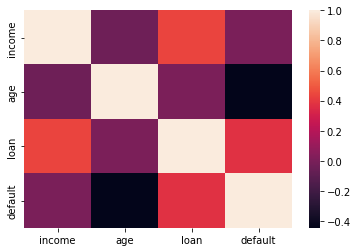

In [ ]:
sns.heatmap(df.corr()) #younger people default more, low income default more, high loan default more

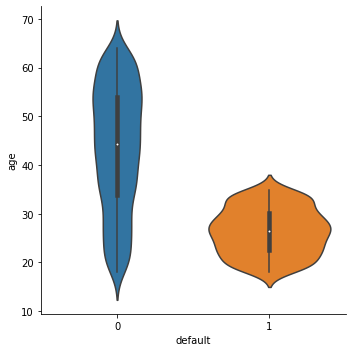

In [ ]:
sns.catplot(data= df, x="default", y="age", kind="violin")

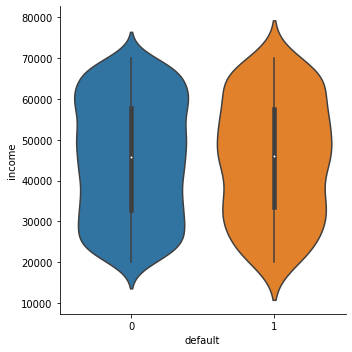

In [ ]:
sns.catplot(x='default', y='income', data=df, kind = "violin")

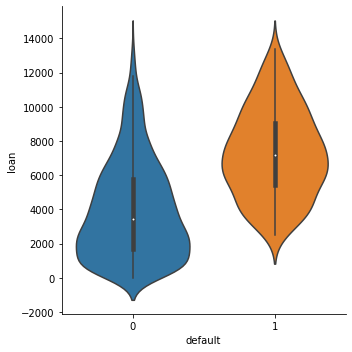

In [ ]:
sns.catplot(x='default', y='loan', data=df, kind = "violin")

In [ ]:
X = df.drop(columns= "default")
Y = df["default"]

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,random_state=1)

In [ ]:
Y_train.value_counts() #will have to oversample Y

0    1283
1     212
Name: default, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
X_train, Y_train = SMOTE(random_state=1).fit_resample(X_train,Y_train)

In [ ]:
Y_train.value_counts()

0    1283
1    1283
Name: default, dtype: int64

In [ ]:
from scipy import stats

In [ ]:
X_test["income"]= stats.zscore(X_test["income"])

In [ ]:
X_test["loan"]= stats.zscore(X_test["loan"])

In [ ]:
X_train["income"]= stats.zscore(X_train["income"])

In [ ]:
X_train["loan"]= stats.zscore(X_train["loan"])

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
from sklearn import linear_model

In [ ]:
model = linear_model.LogisticRegression(random_state=1)

In [ ]:
model.fit(X_train, Y_train)
pred = model.predict(X_test)
cm = confusion_matrix(Y_test, pred)
print("accuracy is ", (cm[0,0]+cm[1,1])/(sum(sum(cm))))


accuracy is  0.875751503006012


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use o

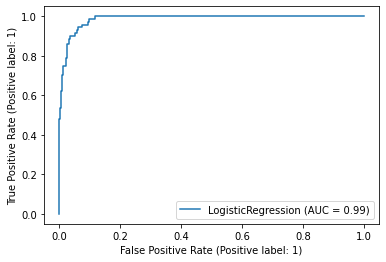

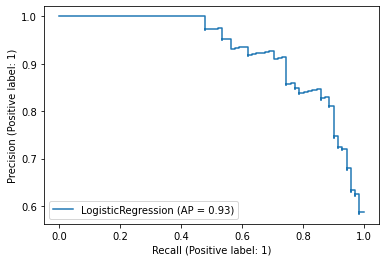

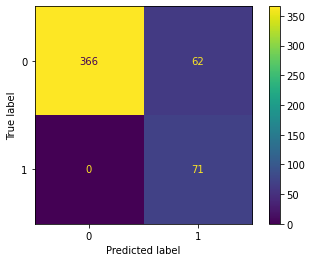

In [ ]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, plot_confusion_matrix
plot_roc_curve(model,X_test, Y_test)
plot_precision_recall_curve(model,X_test,Y_test)
plot_confusion_matrix(model,X_test,Y_test)

In [ ]:
from sklearn import tree

In [ ]:
model = tree.DecisionTreeClassifier(random_state=1)

In [ ]:
model.fit(X_train, Y_train)
pred = model.predict(X_test)
cm = confusion_matrix(Y_test, pred)
print("accuracy is ", (cm[0,0]+cm[1,1])/(sum(sum(cm))))

accuracy is  0.9458917835671342


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use o

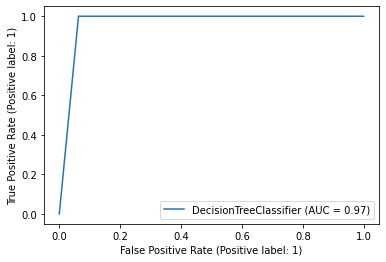

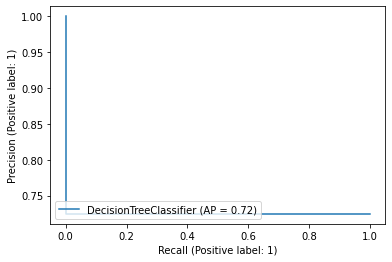

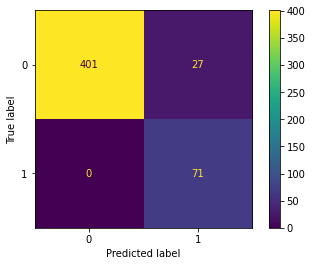

In [ ]:
plot_roc_curve(model,X_test, Y_test)
plot_precision_recall_curve(model,X_test,Y_test)
plot_confusion_matrix(model,X_test,Y_test)

In [ ]:
from sklearn import ensemble

In [ ]:
model = ensemble.RandomForestClassifier(random_state=1)

In [ ]:
model.fit(X_train, Y_train)
pred = model.predict(X_test)
cm = confusion_matrix(Y_test, pred)
print("accuracy is ", (cm[0,0]+cm[1,1])/(sum(sum(cm))))

accuracy is  0.9418837675350702


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use o

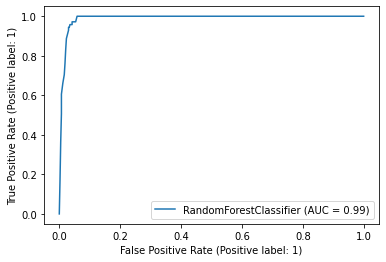

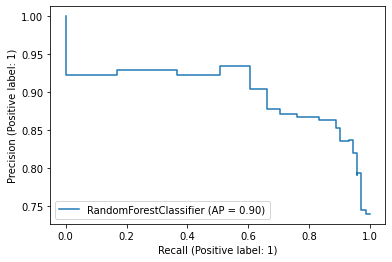

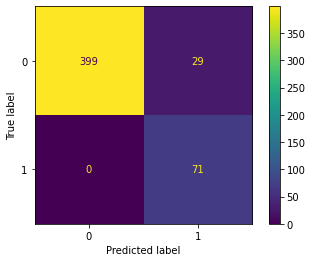

In [ ]:
plot_roc_curve(model,X_test, Y_test)
plot_precision_recall_curve(model,X_test,Y_test)
plot_confusion_matrix(model,X_test,Y_test)

In [ ]:
model = ensemble.GradientBoostingClassifier(random_state=1)

In [ ]:
model.fit(X_train, Y_train)
pred = model.predict(X_test)
cm = confusion_matrix(Y_test, pred)
print("accuracy is ", (cm[0,0]+cm[1,1])/(sum(sum(cm))))

accuracy is  0.9378757515030061


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use o

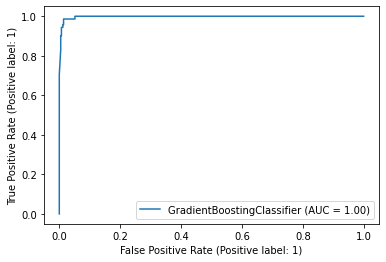

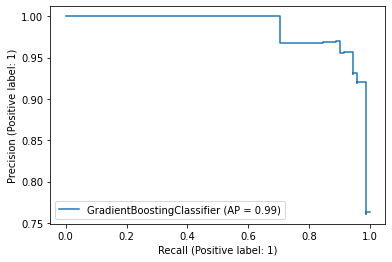

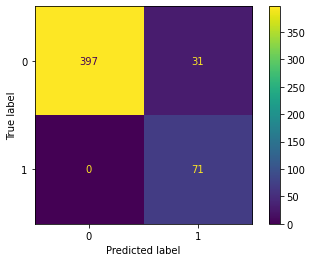

In [ ]:
plot_roc_curve(model,X_test, Y_test)
plot_precision_recall_curve(model,X_test,Y_test)
plot_confusion_matrix(model,X_test,Y_test)

In [ ]:
from sklearn import neural_network

In [ ]:
model = neural_network.MLPClassifier(random_state=1)

In [ ]:
model.fit(X_train, Y_train)
pred = model.predict(X_test)
cm = confusion_matrix(Y_test, pred)
print("accuracy is ", (cm[0,0]+cm[1,1])/(sum(sum(cm))))

accuracy is  0.9078156312625251


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use o

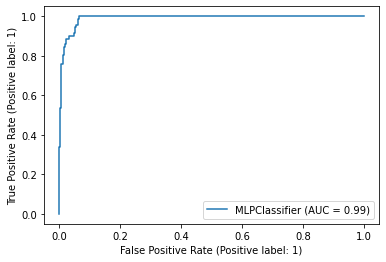

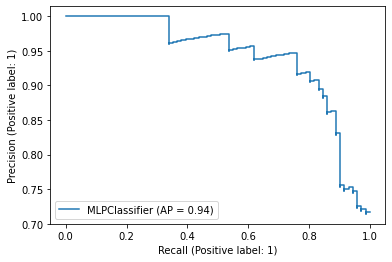

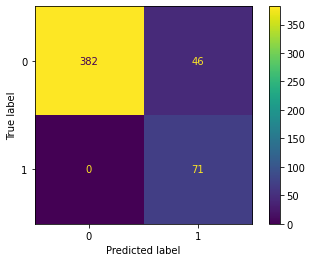

In [ ]:
plot_roc_curve(model,X_test, Y_test)
plot_precision_recall_curve(model,X_test,Y_test)
plot_confusion_matrix(model,X_test,Y_test)

In [ ]:
from keras.models import Sequential

In [ ]:
from keras.layers import Dense,Dropout

In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(3,input_dim=3,activation="relu"))

In [ ]:
model.add(Dropout(0.2))

In [ ]:
model.add(Dense(3,activation="relu"))

In [ ]:
model.add(Dropout(0.2))

In [ ]:
model.add(Dense(1,activation="sigmoid"))

In [ ]:
model.add(Dropout(0.2))

In [ ]:
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [ ]:
history = model.fit(X_train,Y_train,batch_size=32,epochs=100)

Epoch 1/100
81/81 [==============================] - 2s 5ms/step - loss: 2.8393 - accuracy: 0.4953
Epoch 2/100
81/81 [==============================] - 0s 4ms/step - loss: 2.3059 - accuracy: 0.4973
Epoch 3/100
81/81 [==============================] - 0s 3ms/step - loss: 2.1483 - accuracy: 0.4879
Epoch 4/100
81/81 [==============================] - 0s 4ms/step - loss: 2.0341 - accuracy: 0.4977
Epoch 5/100
81/81 [==============================] - 0s 6ms/step - loss: 2.0164 - accuracy: 0.4934
Epoch 6/100
81/81 [==============================] - 0s 5ms/step - loss: 2.0838 - accuracy: 0.4965
Epoch 7/100
81/81 [==============================] - 0s 5ms/step - loss: 2.1733 - accuracy: 0.4844
Epoch 8/100
81/81 [==============================] - 0s 5ms/step - loss: 2.0717 - accuracy: 0.4949
Epoch 9/100
81/81 [==============================] - 1s 11ms/step - loss: 2.1928 - accuracy: 0.4903
Epoch 10/100
81/81 [==============================] - 1s 7ms/step - loss: 2.0484 - accuracy: 0.4918
Epoch 11

In [ ]:
import matplotlib.pyplot as plt

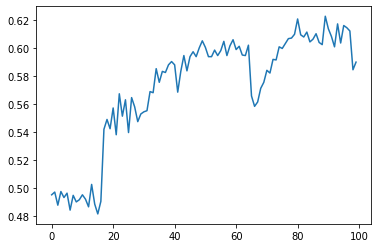

In [ ]:
plt.plot(history.history["accuracy"])

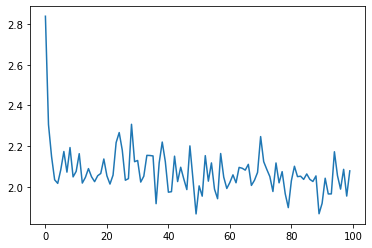

In [ ]:
plt.plot(history.history["loss"])

In [ ]:
model.evaluate(X_test,Y_test)

16/16 [==============================] - 0s 2ms/step - loss: 0.4912 - accuracy: 0.8958


[0.4912385642528534, 0.8957915902137756]

In [ ]:
df.to_csv("CC_Default.csv")